# Code for data processing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import csv

In [2]:
def clover_write(filename, data):
    saveFile = open(filename, 'w')
    saveFile.write(str(data))

In [3]:
def freq_data(k, df):
    x = []
    for i in range (0,len(df),k):
        x.append(i)
    return x

In [4]:
%matplotlib notebook

In [7]:
# reading data file
filename = 'new_clover2020-07-16 03.25.36 PM.csv'
df=pd.read_csv(filename, index_col='Frame')
# исправить значения где z=0

In [8]:
# filling nans with interpolated values
df1 = df.interpolate(method='linear', limit_direction='forward') 

In [9]:
#chosing values, placing in correct order
c_lst = ['Z','X','Y','Time (Seconds)']
r_lst = freq_data(50,df1)

data = df1.loc[r_lst,c_lst]
data.columns = ['X','Y','Z','t']

In [10]:
# get values
temp = data.values

In [11]:
trajectory = temp[:,0:3].tolist()
timeline_sec = temp[:,3].tolist()
my_dic = {'trajectory':trajectory, 'timeline_sec': timeline_sec}

In [12]:
#df = pd.DataFrame({'trajectory': trajectory,
#                   'time_line_sec': time_line_sec})
#df.to_json()#(orient='records')

In [13]:
import json
with open("clover_test_new_OT.json", "w") as write_file:
    json.dump(my_dic, write_file)

In [12]:
#write to a new file
filename_new = 'clover_test1.csv'
data.to_csv(filename_new)

# Plot (just for you)

In [13]:
def fig_check():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = p3.Axes3D(fig)
    fig.show()

    # Setting the axes properties
    ax.set_xlim3d([-1.0, 6.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([-1.0, 6.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-1.0, 2.0])
    ax.set_zlabel('Z')

    ax.set_title('3D Visual')
    
    return ax, fig

In [14]:
# check
X = data.values[:,0]
Y = data.values[:,1]
Z = data.values[:,2]
t = data.values[:,3]

In [15]:
#dataframe check
X1 = np.array(df1['Z'])
Y1 = np.array(df1['X'])
Z1 = np.array(df1['Y'])
t1 = np.array(df1['Time (Seconds)'])

In [16]:
#dataframe check
X2 = np.array(df['Z'])
Y2 = np.array(df['X'])
Z2 = np.array(df['Y'])
t2 = np.array(df['Time (Seconds)'])

In [19]:
%run telemetry.ipynb

<IPython.core.display.Javascript object>


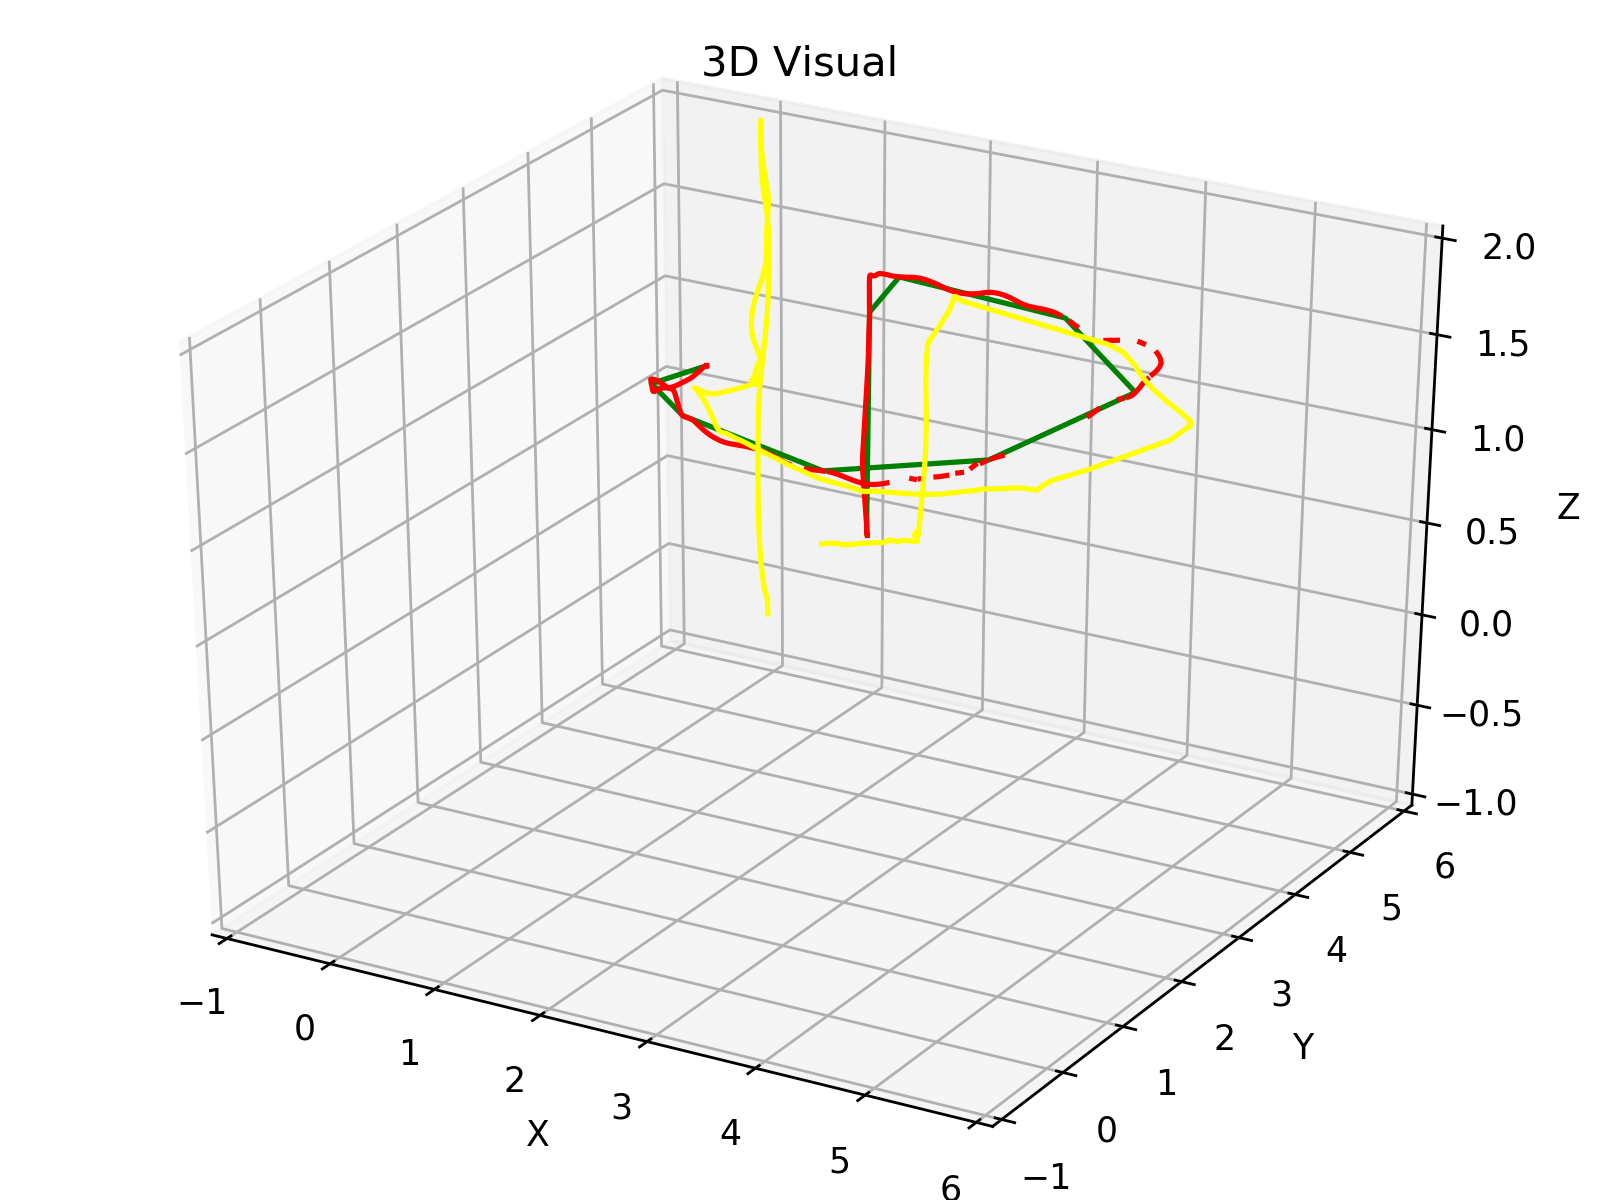

In [21]:
ax, fig = fig_check()
ax.plot(X, Y, Z, color='g')
#ax.plot(X1, Y1, Z1, color='b')
ax.plot(X2, Y2, Z2, color='r')
ax.plot(X3, Y3, Z3, color='yellow')
fig.show()

# Run data reading

In [18]:
#%run read_data_clover.ipynb